### Reading data 
* Pandas support ingesting data from a variety of sources
  * Flat file
      * read_csv()
      * read_table()
      * read_fwf()
      * read_msgpack() 
  * Excel
      * read_excel()
  * JSON/HTML
      * read_json()
      * read_html()
  * SQL
      * read_sql()
      * read_sql_table()
      * read_sql_query()
  * Other
      * read_feather()
      * read_hdf()
      * read_sas()
      * read_feather()
      * read_pickle()
      * read_gbq
* Supplementary reading
  * https://pandas.pydata.org/pandas-docs/stable/api.html#input-output

#### Flat files
* Flat files refer to local or remote files that have tabular data in them
* Properties
  * Each line refers to a single row
  * Each entry in the line corresponds to a single column value
  * Entries are separate by a **delimiter**
* Allowed locations
  * local file system
  * url
    * http
    * ftp
    * s3
    

In [1]:
#load libs
import pandas as pd

In [2]:
import os


In [3]:
os.getcwd()

'D:\\rich\\NU2\\ALY6140\\2921FallA_70648\\M2'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'aly6140_M2_data.zip',
 'aly6140_M2_example.ipynb',
 'data',
 'hw2',
 'script_vs_notebook.ipynb']

In [5]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is F289-CA38

 Directory of D:\rich\NU2\ALY6140\2921FallA_70648\M2

09/29/2021  07:42 PM    <DIR>          .
09/29/2021  07:42 PM    <DIR>          ..
09/29/2021  06:31 PM    <DIR>          .ipynb_checkpoints
07/08/2021  03:08 PM         1,027,260 aly6140_M2_data.zip
07/23/2021  11:34 AM            92,359 aly6140_M2_example.ipynb
09/28/2021  10:10 AM    <DIR>          data
09/29/2021  09:21 PM    <DIR>          hw2
07/31/2021  12:21 AM             4,180 script_vs_notebook.ipynb
               3 File(s)      1,123,799 bytes
               5 Dir(s)  952,557,391,872 bytes free


## Read TXT file

In [2]:
file = open('./data/network_data.txt', 'r')
print(file.read())
print(file.closed)

file.close()
print(file.closed)

FileNotFoundError: [Errno 2] No such file or directory: './data/network_data.txt'

In [7]:
with open('./data/data_txt.txt') as file:
    print(file.read())
    
print(file.closed)

Name	Profession
Sharat	Data scientist
Bill Gates	Philanthropist
Tom Brady	Athlete
Bill Nye	Presenter

True


In [8]:
with open('./data/data_txt.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())
    print(file.readline())

Name	Profession

Sharat	Data scientist

Bill Gates	Philanthropist

Tom Brady	Athlete



In [9]:
#read data_txt.txt file
df = pd.read_table('./data/data_txt.txt', sep='\t', header=0)
df

,Name,Profession
0,Sharat,Data scientist
1,Bill Gates,Philanthropist
2,Tom Brady,Athlete
3,Bill Nye,Presenter


In [10]:
# We can override column names
df = pd.read_table('./data/data_txt.txt', sep='\t', 
                   names = ['Full Name', 'Current Profession'],
                   header=0)
df

,Full Name,Current Profession
0,Sharat,Data scientist
1,Bill Gates,Philanthropist
2,Tom Brady,Athlete
3,Bill Nye,Presenter


## Read CSV file

* Important options for read_table()/read_csv()
  * true_values: list of values that mean True
  * false_values: list of values that mean False
  * na_values : list of values thatmean NA/NAN
  * usecols: list of column indices or names to read
  * parse_dates: boolean or list of intes or names of columns to consider for
      parsing dates
  * nrows: number of rows to read
  * compression: 'infer', 'gzip', 'bz2', 'zip', 'xz'
  * comment: comment indicator. Rest of the line is skipped 
  * dtypes: Both read_table() and read_csv() infer the data type from the values available. Data types can be explicity specified as a dict of column name: numpy dtype

#### CSV files
* CSV (Comma separated values) are format of choice to exchange tabular data
    * Each line corresponds to a row
    * Each entry in the line corresponds to a column
    * Entries are separated by comma (,)
    * The first row contains the names of the columns
* Its a special case of tabular data with sep=','

In [11]:
#read data_csv.csv
df = pd.read_csv('./data/data_csv.csv')
df

,Name,Profession
0,Sharat,Data scientist
1,Bill Gates,Philanthropist
2,Tom Brady,Athlete
3,Bill Nye,Presenter


In [12]:
#read csv file with read_table
df = pd.read_table('./data/data_csv.csv', sep=',', header=0)
df

,Name,Profession
0,Sharat,Data scientist
1,Bill Gates,Philanthropist
2,Tom Brady,Athlete
3,Bill Nye,Presenter


In [13]:
# Remote location https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv
data = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(data)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Read Excel file
* Flat files are organized into 'row's and 'column's 
* Excel files are organized 
  * sheet
  * row 
  * column
* A single sheet correspondns to one or more sets of tabular data
* Example
<table>
<td><img src="excel_file.png"></td>
<td><img src="excel_file_2.png"></td>
</table>

In [14]:
#read data_excel.xlsx Profession sheet
df_pro = pd.read_excel('./data/data_excel.xlsx', sheet_name='Profession')
df_pro

,First Name,Last Name,Profession
0,Sharat,Chikkerur,Data scientist
1,Tom,Brady,Athlete
2,Bill,Nye,TV Personality
3,Bill,Gates,Philanthropist


In [15]:
#read data_excel.xlsx Age sheet
df_age = pd.read_excel('./data/data_excel.xlsx', sheet_name='Age')
df_age

,First Name,Last Name,Age
0,Sharat,Chikkerur,38
1,Tom,Brady,40
2,Bill,Nye,62
3,Barack,Obama,56


In [16]:
#demonstrate left, right, inner & outer join method
df_merge = df_pro.merge(df_age,
                       on = ['First Name', 'Last Name'],
                       how = 'right')
df_merge

,First Name,Last Name,Profession,Age
0,Sharat,Chikkerur,Data scientist,38
1,Tom,Brady,Athlete,40
2,Bill,Nye,TV Personality,62
3,Barack,Obama,NaN,56


In [17]:
#check null 
df_merge.isnull().sum()

First Name    0
Last Name     0
Profession    1
Age           0
dtype: int64

#### Additional options
```python
pandas.read_excel(io, sheet_name=0, header=0, skiprows=None, skip_footer=0, index_col=None, names=None, usecols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, converters=None, dtype=None, true_values=None, false_values=None, engine=None, squeeze=False, **kwds)
```
* **skiprows** : Rows to skip in the beginning
* **skip_footer**: Rows to skip in the end
* **names** : List of column names to use
* **header** : None if there is no header, otherwise row number to use
* **usecols** : Selectively include columns
* **na_values** : Additional string to recognize as NA

* Supplementary reading
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.htm

## Read Pickled file

In [20]:
import pickle

data = {
    'Name': ['Sharat', 'Bill Gates', 'Tom Brady', 'Bill Nye'],
    'Profession': {'Data scientist', 'Philanthropist', 'Athlete', 'Presenter'}
}

with open('./data/data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [21]:
with open('./data/data.pickle', 'rb') as f:
    print(pickle.load(f))

{'Name': ['Sharat', 'Bill Gates', 'Tom Brady', 'Bill Nye'], 'Profession': {'Philanthropist', 'Athlete', 'Data scientist', 'Presenter'}}


## Read HDF5 file

In [23]:
!pip install h5py

In [24]:
import h5py
import numpy as np

with h5py.File("./data/data.hdf5", "w") as f:
    dset = f.create_dataset("dataset_h5py", (100,), dtype='i')

In [25]:
f = h5py.File('./data/data.hdf5', 'r')
list(f.keys())

['dataset_h5py']

In [26]:
d = f['dataset_h5py']
print(d)
print(d.shape)
print(d.dtype)

<HDF5 dataset "dataset_h5py": shape (100,), type "<i4">
(100,)
int32


In [27]:
#H-H1_LOSC_4_V2-1126259446-32.hdf5
#strain data at 4096Hz around 32 seconds

frequency = 4096

file = './data/H-H1_LOSC_4_V2-1126259446-32.hdf5'
hdf = h5py.File(file, 'r')

print(type(hdf))

for key in hdf.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


In [28]:
for key in hdf['meta'].keys():
    print(key)

Description
DescriptionURL
Detector
Duration
GPSstart
Observatory
Type
UTCstart


In [29]:
#H5pyDeprecationWarning
#print(hdf['meta'][('Observatory')].value) 

print(hdf['meta']['Detector'][()])
print(hdf['meta']['Duration'][()])
print(hdf['meta']['Observatory'][()])
print(str(hdf['meta']['UTCstart'][()], 'utf-8'))

b'H1'
32
b'H'
2015-09-14T09:50:29


In [30]:
strain = hdf['strain']['Strain']
print(len(strain)/frequency)

32.0


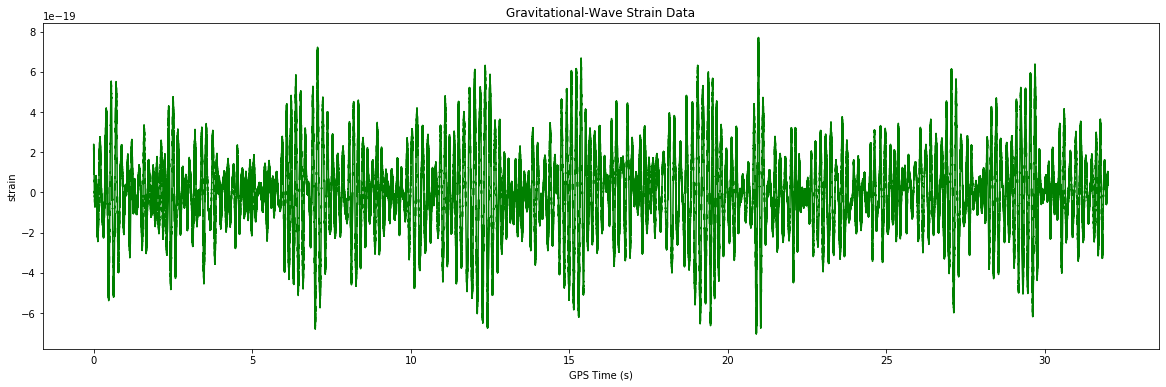

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,6))

time_span = 32
num_samples = frequency * time_span

time = np.arange(0, time_span, time_span/num_samples)

plt.plot(time, strain[:num_samples], 'g')
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.title('Gravitational-Wave Strain Data')
plt.show()

## Reading data from SQL
* SQL sources store data in relational form
  * Data is organized into databases
  * Each database consists of one or more tables
  * Each table consists of rows and columns
* Benefits of SQL
  * Tables can be logically linked using joins
  * Row and column subsets can be expressed through SQL queries 
* Pandas
  * pandas.io.sql module provides a collection of wrappers to connect to SQL databases
  * Its abstracts the DB specific APIs (requires sqlalchemy to be installed)
  * Steps
    * Create a connection using sqlalchemy.create_connection()
    * Access data using table name or query
        * read_sql_table()
        * read_sql_query()
        * read_sql()

### Accessing  databases
* For this exercise, we will try to access a local SQL database using sqlite. 
* Procedure to access remote database are similar. 
* The local database was created in SQLite using the following
```sql
sqlite> .open pro_and_age
sqlite> create table profession(first_name varchar ,last_name varchar, profession varchar);
sqlite> create table age(first_name varchar, last_name varchar, age int);
sqlite> insert into profession values (("Sharat", "Chikkerur", "Data scientist"), ("Tom", "Brady", "Athlete"), ("Bill", "Nye", "TV Personality"), ("Bill", "Gates", "Philanthropist"));
sqlite> insert into profession values ("Sharat", "Chikkerur", "Data scientist"), ("Tom", "Brady", "Athlete"), ("Bill", "Nye", "TV Personality"), ("Bill", "Gates", "Philanthropist");
sqlite> insert into age values("Sharat","Chikkerur", 38), ("Tom", "Brady", 40), ("Bill", "Nye", 62), ("Barack", "Obama", 56);
```

In [34]:
from sqlalchemy import create_engine

#For a relative file path, this requires three slashes
#Load database pro_and_age.db
engine = create_engine("sqlite:///./data/pro_and_age.db") 

In [35]:
engine.table_names()

['age', 'profession']

In [36]:
#read table profession
pd.read_sql_table('profession', engine)

,first_name,last_name,profession
0,Sharat,Chikkerur,Data scientist
1,Tom,Brady,Athlete
2,Bill,Nye,TV Personality
3,Bill,Gates,Philanthropist


In [37]:
#read table age
pd.read_sql_table('age', engine)

,first_name,last_name,age
0,Sharat,Chikkerur,38
1,Tom,Brady,40
2,Bill,Nye,62
3,Barack,Obama,56


In [38]:
#sql query

df_inner = pd.read_sql_query(
"""
select p.first_name, p.last_name, p.profession, a.age
from 
    profession p
    inner join age a
    on 
        p.first_name = a.first_name and
        p.last_name = a.last_name
""", engine)

df_inner

#OperationalError: (sqlite3.OperationalError) RIGHT and FULL 
#OUTER JOINs are not currently supported
#only left & inner work

,first_name,last_name,profession,age
0,Sharat,Chikkerur,Data scientist,38
1,Tom,Brady,Athlete,40
2,Bill,Nye,TV Personality,62


In [40]:
#check null 
df_inner.isnull().sum()

first_name    0
last_name     0
profession    0
age           0
dtype: int64

In [41]:
query = """
select p.first_name, p.last_name, p.profession, a.age
from 
    profession p
    left join age a
    on 
        p.first_name = a.first_name and
        p.last_name = a.last_name
"""

df_left = pd.read_sql(query, engine)
df_left

,first_name,last_name,profession,age
0,Sharat,Chikkerur,Data scientist,38.0
1,Tom,Brady,Athlete,40.0
2,Bill,Nye,TV Personality,62.0
3,Bill,Gates,Philanthropist,NaN


## Scraping data from the web

* Data on the web might be
  * csv, excel, flat files available through a URL
  * structured data available through an API
  * unstructured data embedded as parts of a web page
* Flat files
  * read_csv(), read_excel(), read_table() support URL as location of files
* Structure data:
  * requests library allows us to read/write to web-apis
* Unstructured data
  * BeautifulSoup library allows us to parse html pages and extract information

#### Structured data
* RESTful APIs allow us to query data by placing http calls
* requests library allows us to access data available through http(s) protocol
* Example:
  * Coindesk provides a http api to get current bitcoin prices
    * https://www.coindesk.com/api/
  * We can use requests library to access current price
```python
import requests
URL = 'https://api.coindesk.com/v1/bpi/currentprice/USD.json'
response = requests.get(URL)
response.json()
```
* A list of open access APIs is curated at
https://github.com/toddmotto/public-apis

In [42]:
import requests

URL = 'http://api.open-notify.org/astros.json'
response = requests.get(URL)
json = response.json()

# Here is the entire result
for n in response.json()['people']:
    print(f"{n['name']} is in space on the {n['craft']} craft.")

Mark Vande Hei is in space on the ISS craft.
Oleg Novitskiy is in space on the ISS craft.
Pyotr Dubrov is in space on the ISS craft.
Thomas Pesquet is in space on the ISS craft.
Megan McArthur is in space on the ISS craft.
Shane Kimbrough is in space on the ISS craft.
Akihiko Hoshide is in space on the ISS craft.


In [43]:
import pandas as pd
response = pd.read_json(URL)
response

,people,number,message
0,"{'craft': 'ISS', 'name': 'Mark Vande Hei'}",7,success
1,"{'craft': 'ISS', 'name': 'Oleg Novitskiy'}",7,success
2,"{'craft': 'ISS', 'name': 'Pyotr Dubrov'}",7,success
3,"{'craft': 'ISS', 'name': 'Thomas Pesquet'}",7,success
4,"{'craft': 'ISS', 'name': 'Megan McArthur'}",7,success
5,"{'craft': 'ISS', 'name': 'Shane Kimbrough'}",7,success
6,"{'craft': 'ISS', 'name': 'Akihiko Hoshide'}",7,success


In [44]:
import requests
URL = 'https://api.coindesk.com/v1/bpi/currentprice/USD.json'
response = requests.get(URL)
json = response.json()

# Here is the entire result
print(json)

{'time': {'updated': 'Oct 1, 2021 07:52:00 UTC', 'updatedISO': '2021-10-01T07:52:00+00:00', 'updateduk': 'Oct 1, 2021 at 08:52 BST'}, 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org', 'bpi': {'USD': {'code': 'USD', 'rate': '44,758.3200', 'description': 'United States Dollar', 'rate_float': 44758.32}}}


In [45]:
# We can access specific fields through the json attribute
print("Current price")
print(json.get('bpi').get('USD').get('rate_float'))
print(json.get('time').get('updated'))

Current price
44758.32
Oct 1, 2021 07:52:00 UTC


#### Example
* Use metaweather API to get weather in london next two days
    * https://www.metaweather.com/api/

In [46]:
import requests

URL = 'https://api.exchangerate-api.com/v4/latest/USD'
response = requests.get(URL).json()

print(f"EUR/USD: {response['rates']['EUR']}")
print(f"USD/JPY: {response['rates']['JPY']}")

EUR/USD: 0.861
USD/JPY: 111.73


In [47]:
# Get geocode for London
url = 'https://www.metaweather.com/api/location/search/?query=boston'
response =  requests.get(url)
json = response.json()
print(json)

id = json[0].get('woeid')
print(id)

[{'title': 'Boston', 'location_type': 'City', 'woeid': 2367105, 'latt_long': '42.358631,-71.056702'}]
2367105


In [48]:
# Use geocode to access weather next three days

url = f'https://www.metaweather.com/api/location/{id}'

response = requests.get(url)
json = response.json()
json.get('consolidated_weather')[0:3]

[{'id': 4833514865295360,
  'weather_state_name': 'Light Cloud',
  'weather_state_abbr': 'lc',
  'wind_direction_compass': 'NW',
  'created': '2021-10-01T07:25:50.044229Z',
  'applicable_date': '2021-10-01',
  'min_temp': 9.95,
  'max_temp': 17.595,
  'the_temp': 17.24,
  'wind_speed': 5.4415723746467295,
  'wind_direction': 305.6969136168543,
  'air_pressure': 1018.5,
  'humidity': 53,
  'visibility': 15.30561520719001,
  'predictability': 70},
 {'id': 4816070293585920,
  'weather_state_name': 'Light Cloud',
  'weather_state_abbr': 'lc',
  'wind_direction_compass': 'W',
  'created': '2021-10-01T07:25:52.248411Z',
  'applicable_date': '2021-10-02',
  'min_temp': 10.120000000000001,
  'max_temp': 20.384999999999998,
  'the_temp': 19.77,
  'wind_speed': 5.500402664018135,
  'wind_direction': 267.4247591415041,
  'air_pressure': 1019.0,
  'humidity': 54,
  'visibility': 15.31524646066969,
  'predictability': 70},
 {'id': 5751710933843968,
  'weather_state_name': 'Showers',
  'weather_stat

#### Scraping data from the web
* When possible use APIs to access data
* In instances where APIs are not available, scraping can be used to parse the contents back to structured data
* Note:
  * Do not violate terms of service when scraping
  * Set a rate limit to scraping to avoid taking down website
* Process
  * Extract raw html
  * Use BeautifulSoup library to parse contents
  * Extract information from specific sections of the page

In [49]:
#open data_html.html
page = open('./data/data_html.html').read()
print(page)

<html>  
    <head>
    </head>
    <body>
        <h1> First title </h1>
        <h1> Second title </h1>
	<p class="content"> First paragraph </p>
	<p class="description"> Second paragraph </p>
    <body>
</html>



In [50]:
from IPython.core.display import display, HTML
display(HTML(page))

In [51]:
# Extracting data from the web page BeautifulSoup

from bs4 import BeautifulSoup
soup = BeautifulSoup(page, 'html.parser')
#print(soup.prettify())

In [52]:
soup.find_all('h1')

[<h1> First title </h1>, <h1> Second title </h1>]

In [53]:
#Extracting content of the heading
for heading in soup.find_all('h1'):
    print(heading.get_text())

 First title 
 Second title 


In [54]:
# We can use attributes of the tag to extract specific tags
soup.find_all('p')

[<p class="content"> First paragraph </p>,
 <p class="description"> Second paragraph </p>]

In [55]:
# We can use attributes of the tag to extract specific tags
soup.find_all('p', class_="content")

[<p class="content"> First paragraph </p>]